In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
os.environ['OMP_NUM_THREADS'] = '1'


# Specify the file path
file_path = "Merged_Aneurysm.csv"

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
data

import warnings
warnings.simplefilter("ignore", category=UserWarning)



In [21]:
print(f'{data.columns}\n {data.shape}')

characteristics = [f'{data.columns}']



Index(['case_id', 'patient_id', 'aneurysmLocation', 'aneurysmType',
       'ruptureStatus', 'age', 'sex', 'multipleAneurysms', 'sacVolume',
       'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 'sacSectionArea',
       'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis',
       'ellipsoidMinSemiaxis', 'sacCenterlineLength', 'ostiumSectionArea',
       'ostiumSectionPerimeter', 'ostiumMinSize', 'ostiumMaxSize',
       'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star',
       'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'sacMinPressure',
       'sacMaxPressure', 'sacMeanPressure', 'sacMaxSpeed', 'sacMeanSpeed',
       'sacMinTAWSS', 'sacMaxTAWSS', 'sacMeanTAWSS', 'sacMinOSI', 'sacMaxOSI',
       'sacMeanOSI', 'vesselName', 'length', 'meanRadius', 'meanCurvature',
       'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 'maxCurvature',
       'maxTorsion', 'bifurcationAngleInPlane', 'bifurcationAngleOutOfPlane',
       'minPressure', 'maxPressure', '

In [22]:
data.dtypes

case_id                        object
patient_id                     object
aneurysmLocation               object
aneurysmType                   object
ruptureStatus                  object
age                             int64
sex                            object
multipleAneurysms                bool
sacVolume                     float64
sacSurfaceArea                float64
vdcVolume                     float64
vdcSurfaceArea                float64
sacSectionArea                float64
ellipsoidVolume               float64
ellipsoidMaxSemiaxis          float64
ellipsoidMidSemiaxis          float64
ellipsoidMinSemiaxis          float64
sacCenterlineLength           float64
ostiumSectionArea             float64
ostiumSectionPerimeter        float64
ostiumMinSize                 float64
ostiumMaxSize                 float64
ostiumShapeFactor             float64
aspectRatio_star              float64
sizeRatio_star                float64
vesselDiameter                float64
neckVesselAn

In [23]:
import pandas as pd
import numpy as np

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Specify the file path
file_path = "Merged_Aneurysm.csv"

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Define the list of characteristics to be used including rupture status
characteristics_with_rupture = ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 
                                'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
                                'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength', 
                                'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
                                'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
                                'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
                                'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
                                'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
                                'bifurcationAngleOutOfPlane', 'sex', 'multipleAneurysms', 
                                'aneurysmLocation', 'aneurysmType', 'ruptureStatus']

# Filter the data to include only the selected characteristics
data = data[characteristics_with_rupture]

# Convert numeric columns that are of object type to numeric
for col in ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 'sacSectionArea', 
            'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 
            'sacCenterlineLength', 'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
            'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 'vesselDiameter', 
            'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 'meanCurvature', 'meanTorsion', 'tortuosity', 
            'minRadius', 'maxRadius', 'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
            'bifurcationAngleOutOfPlane']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert categorical variables to numeric
for col in ['sex', 'multipleAneurysms', 'aneurysmLocation', 'aneurysmType', 'ruptureStatus']:
    data[col] = data[col].astype('category').cat.codes

# Handle missing values by filling them with a specific placeholder
data.fillna(-1, inplace=True)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)



For n_clusters = 2, the average silhouette_score is 0.743936260641038
For n_clusters = 3, the average silhouette_score is 0.5354106235664097
For n_clusters = 4, the average silhouette_score is 0.5378168421531726


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

For n_clusters = 5, the average silhouette_score is 0.4999442171433185
For n_clusters = 6, the average silhouette_score is 0.4589696925115732
For n_clusters = 7, the average silhouette_score is 0.416218569514141
For n_clusters = 8, the average silhouette_score is 0.39513372850625056
For n_clusters = 9, the average silhouette_score is 0.3560497283172674


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10, the average silhouette_score is 0.28394364414408624


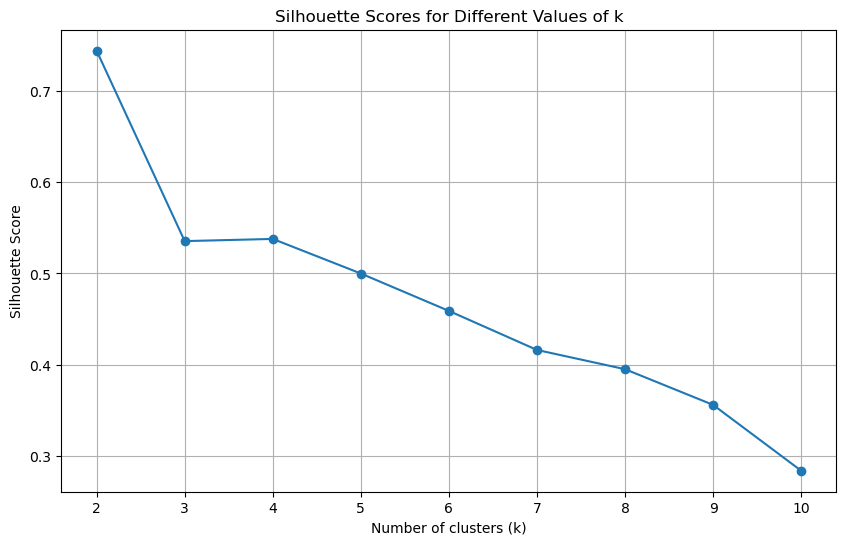

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Define the range of k values to evaluate
k_values = range(2, 11)

# Initialize a list to store silhouette scores
silhouette_scores = []

# Calculate silhouette scores for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the average silhouette_score is {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Example parameters to tune
perplexities = [5, 30, 50]
learning_rates = [10, 200, 1000]
n_iters = [250, 500, 1000]

# Store results for comparison
results = []

for p in perplexities:
    for lr in learning_rates:
        for n_iter in n_iters:
            tsne = TSNE(n_components=2, perplexity=p, learning_rate=lr, n_iter=n_iter, random_state=42)
            tsne_results = tsne.fit_transform(scaled_data)
            
            kmeans_tsne = KMeans(n_clusters=2, random_state=42)
            clusters_tsne = kmeans_tsne.fit_predict(tsne_results)
            
            silhouette_tsne = silhouette_score(tsne_results, clusters_tsne)
            
            results.append((p, lr, n_iter, silhouette_tsne))
            print(f'Perplexity: {p}, Learning Rate: {lr}, n_iter: {n_iter}, Silhouette Score: {silhouette_tsne}')

# Find the best parameters
best_params = max(results, key=lambda x: x[3])
print(f'Best parameters: Perplexity: {best_params[0]}, Learning Rate: {best_params[1]}, n_iter: {best_params[2]}, Silhouette Score: {best_params[3]}')


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Perplexity: 5, Learning Rate: 10, n_iter: 250, Silhouette Score: 0.8571164011955261


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Perplexity: 5, Learning Rate: 10, n_iter: 500, Silhouette Score: 0.5797255635261536


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Perplexity: 5, Learning Rate: 10, n_iter: 1000, Silhouette Score: 0.6020044684410095
Perplexity: 5, Learning Rate: 200, n_iter: 250, Silhouette Score: 0.4608520567417145


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Perplexity: 5, Learning Rate: 200, n_iter: 500, Silhouette Score: 0.49385496973991394


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Perplexity: 5, Learning Rate: 200, n_iter: 1000, Silhouette Score: 0.906755268573761
Perplexity: 5, Learning Rate: 1000, n_iter: 250, Silhouette Score: 0.8435763716697693


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Perplexity: 5, Learning Rate: 1000, n_iter: 500, Silhouette Score: 0.8318338990211487


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Perplexity: 5, Learning Rate: 1000, n_iter: 1000, Silhouette Score: 0.8008669018745422
Perplexity: 30, Learning Rate: 10, n_iter: 250, Silhouette Score: 0.5371966361999512


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Perplexity: 30, Learning Rate: 10, n_iter: 500, Silhouette Score: 0.5371339917182922


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Perplexity: 30, Learning Rate: 10, n_iter: 1000, Silhouette Score: 0.5380108952522278
Perplexity: 30, Learning Rate: 200, n_iter: 250, Silhouette Score: 0.8178430795669556


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Perplexity: 30, Learning Rate: 200, n_iter: 500, Silhouette Score: 0.5494833588600159


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Perplexity: 30, Learning Rate: 200, n_iter: 1000, Silhouette Score: 0.5433991551399231
Perplexity: 30, Learning Rate: 1000, n_iter: 250, Silhouette Score: 0.8292056918144226


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Perplexity: 30, Learning Rate: 1000, n_iter: 500, Silhouette Score: 0.8130588531494141


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Perplexity: 30, Learning Rate: 1000, n_iter: 1000, Silhouette Score: 0.7711800336837769
Perplexity: 50, Learning Rate: 10, n_iter: 250, Silhouette Score: 0.5053805112838745


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Perplexity: 50, Learning Rate: 10, n_iter: 500, Silhouette Score: 0.5043721199035645


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Perplexity: 50, Learning Rate: 10, n_iter: 1000, Silhouette Score: 0.5043559074401855
Perplexity: 50, Learning Rate: 200, n_iter: 250, Silhouette Score: 0.47371387481689453


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Perplexity: 50, Learning Rate: 200, n_iter: 500, Silhouette Score: 0.5031205415725708


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Perplexity: 50, Learning Rate: 200, n_iter: 1000, Silhouette Score: 0.503002405166626
Perplexity: 50, Learning Rate: 1000, n_iter: 250, Silhouette Score: 0.570605456829071


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Perplexity: 50, Learning Rate: 1000, n_iter: 500, Silhouette Score: 0.3130788803100586
Perplexity: 50, Learning Rate: 1000, n_iter: 1000, Silhouette Score: 0.3477279841899872
Best parameters: Perplexity: 5, Learning Rate: 200, n_iter: 1000, Silhouette Score: 0.906755268573761


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (t-SNE with Optimal Parameters): 0.8571164011955261


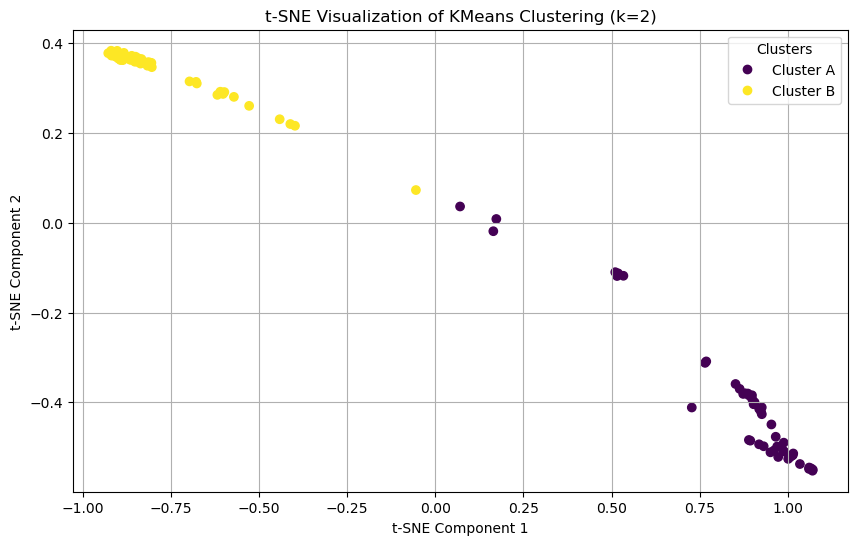

In [26]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Apply t-SNE with optimal parameters
tsne = TSNE(n_components=2, perplexity=5, learning_rate=10, n_iter=250, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

# Reapply KMeans clustering with the results
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(tsne_results)

# Map numeric cluster labels to 'A' and 'B'
cluster_mapping = {0: 'A', 1: 'B'}
cluster_labels = [cluster_mapping[label] for label in clusters_tsne]

# Compute silhouette score on t-SNE results
silhouette_tsne = silhouette_score(tsne_results, clusters_tsne)
print(f'Silhouette Score (t-SNE with Optimal Parameters): {silhouette_tsne}')

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters_tsne, cmap='viridis', marker='o')
plt.title('t-SNE Visualization of KMeans Clustering (k=2)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Add a colorbar with new cluster labels
handles, _ = scatter.legend_elements()
plt.legend(handles, ['Cluster A', 'Cluster B'], title="Clusters")

plt.grid(True)
plt.show()


Calinski-Harasz Index (t-SNE with Optimal Parameters): 1473.5636198557445
Davies-Bouldin Score (t-SNE with Optimal Parameters): 0.1889385784830461


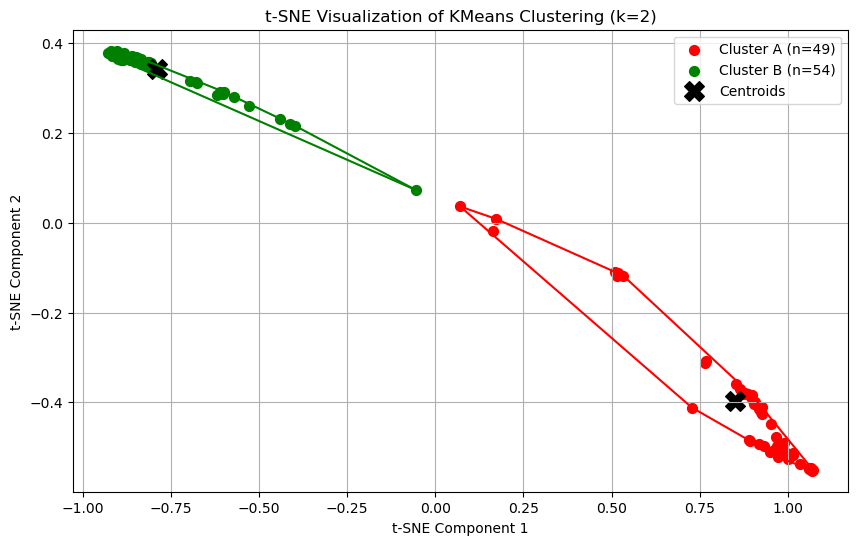

In [27]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from scipy.spatial import ConvexHull
import numpy as np

# Calculate Calinski-Harabasz Index (CSI)
csi_tsne = calinski_harabasz_score(tsne_results, clusters_tsne)
print(f'Calinski-Harasz Index (t-SNE with Optimal Parameters): {csi_tsne}')

# Calculate Davies-Bouldin Score
db_tsne = davies_bouldin_score(tsne_results, clusters_tsne)
print(f'Davies-Bouldin Score (t-SNE with Optimal Parameters): {db_tsne}')

# Plot the t-SNE results with centroids and convex hulls
plt.figure(figsize=(10, 6))
colors = ['red', 'green']

for cluster in range(2):
    cluster_data = tsne_results[clusters_tsne == cluster]
    count = np.sum(clusters_tsne == cluster)  # Count the number of data points in each cluster
    label = f'Cluster {cluster_mapping[cluster]} (n={count})'
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=label, s=50, color=colors[cluster])
    
    # Compute the convex hull for each cluster
    if len(cluster_data) > 2:  # ConvexHull requires at least 3 points
        hull = ConvexHull(cluster_data)
        for simplex in hull.simplices:
            plt.plot(cluster_data[simplex, 0], cluster_data[simplex, 1], color=colors[cluster], linestyle='-', linewidth=1.5)

# Get the centroids in the reduced t-SNE space
centroids_tsne = kmeans_tsne.cluster_centers_
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title('t-SNE Visualization of KMeans Clustering (k=2)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
import numpy as np

# Re-run KMeans multiple times
n_runs = 10
stability_scores = []

for _ in range(n_runs):
    clusters_tsne = KMeans(n_clusters=2, random_state=np.random.randint(0, 10000)).fit_predict(tsne_results)
    silhouette_tsne = silhouette_score(tsne_results, clusters_tsne)
    stability_scores.append(silhouette_tsne)

print(f'Stability Scores: {stability_scores}')
print(f'Average Silhouette Score: {np.mean(stability_scores)}')
print(f'Standard Deviation of Silhouette Scores: {np.std(stability_scores)}')


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Stability Scores: [0.8571164, 0.8571164, 0.8571164, 0.8571164, 0.8571164, 0.8571164, 0.8571164, 0.8571164, 0.8571164, 0.8571164]
Average Silhouette Score: 0.8571164011955261
Standard Deviation of Silhouette Scores: 0.0


c:\Users\shrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
import pandas as pd

# Add cluster labels to the original data
data['Cluster'] = clusters_tsne

# Calculate descriptive statistics
descriptive_stats = data.groupby('Cluster').agg(['mean', 'std', 'min', 'max'])

# Set display options to show more rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Adjust width to fit the content

# Display descriptive statistics
print(descriptive_stats)


               age                      sacVolume                        \
              mean        std min max        mean         std       min   
Cluster                                                                   
0        53.018519  13.699595  24  77  114.778485  131.195163  2.339496   
1        56.285714  13.803683  26  85  310.160011  355.589789  9.376307   

                     sacSurfaceArea                                     \
                 max           mean         std        min         max   
Cluster                                                                  
0         512.888418     100.680921   82.587468   7.333407  374.230654   
1        1312.025948     193.889729  160.520900  18.084625  625.717664   

          vdcVolume                                    vdcSurfaceArea  \
               mean         std       min          max           mean   
Cluster                                                                 
0        102.111695  119.761717  2

                       Feature  Mutual Information
26                   maxRadius            0.625867
18              vesselDiameter            0.535443
21                  meanRadius            0.531751
24                  tortuosity            0.530294
27                maxCurvature            0.511872
22               meanCurvature            0.481342
25                   minRadius            0.207247
19             neckVesselAngle            0.199697
20              sacVesselAngle            0.160579
12      ostiumSectionPerimeter            0.128249
23                 meanTorsion            0.108089
30  bifurcationAngleOutOfPlane            0.103365
28                  maxTorsion            0.098161
6              ellipsoidVolume            0.088886
8         ellipsoidMidSemiaxis            0.073552
1                    sacVolume            0.066746
15           ostiumShapeFactor            0.066620
3                    vdcVolume            0.050310
2               sacSurfaceArea 

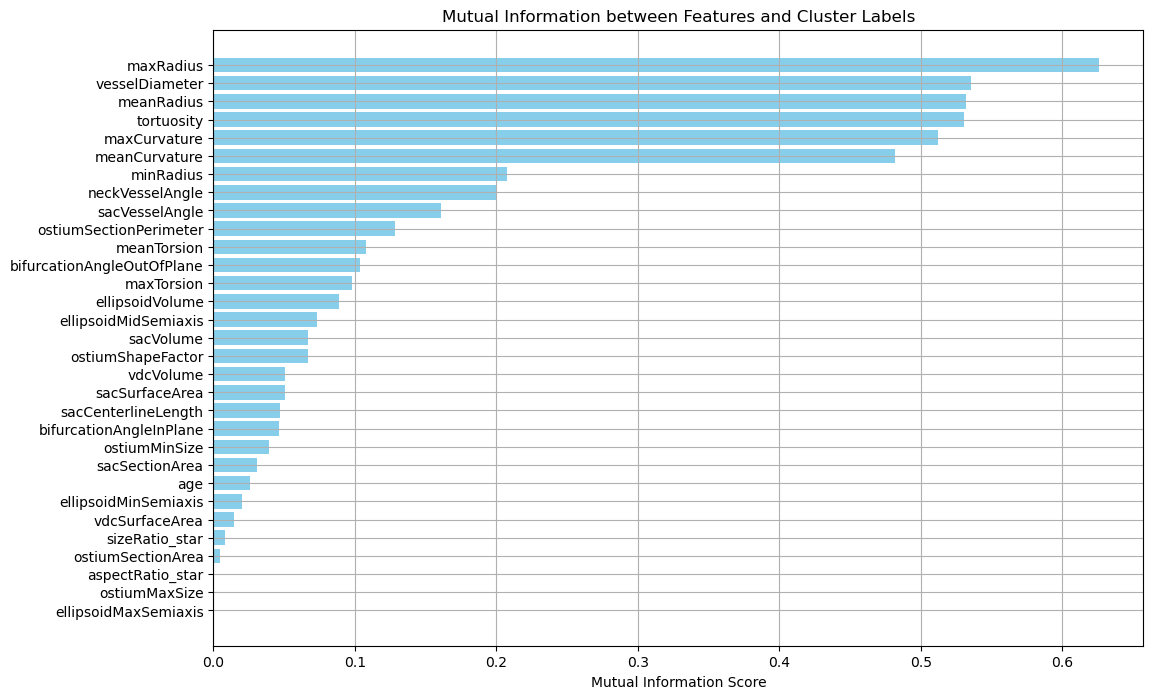

In [30]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Cluster' is the column with cluster labels
# Define your list of feature column names (replace with actual feature names if needed)
features = [
    'age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea',
    'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
    'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength',
    'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
    'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
    'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
    'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
    'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
    'bifurcationAngleOutOfPlane'
]

# Extract features and the cluster labels
X = data[features]
y = data['Cluster']

# Calculate mutual information
mi = mutual_info_classif(X, y)

# Create a DataFrame to hold the results
mi_df = pd.DataFrame({'Feature': features, 'Mutual Information': mi})

# Sort the results by mutual information score
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Display the results
print(mi_df)

# Plot the mutual information scores
plt.figure(figsize=(12, 8))
plt.barh(mi_df['Feature'], mi_df['Mutual Information'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information between Features and Cluster Labels')
plt.gca().invert_yaxis()  # Highest scores at the top
plt.grid(True)
plt.show()


In [31]:
from scipy import stats
features = characteristics_with_rupture
# Initialize dictionaries to store test results
t_test_results = {}
mann_whitney_results = {}

for feature in features:
    cluster_0 = data[data['Cluster'] == 0][feature]
    cluster_1 = data[data['Cluster'] == 1][feature]

    # Check normality with Shapiro-Wilk test
    _, p_value_shapiro_0 = stats.shapiro(cluster_0)
    _, p_value_shapiro_1 = stats.shapiro(cluster_1)

    # Perform t-test or Mann-Whitney U test based on normality
    if p_value_shapiro_0 > 0.05 and p_value_shapiro_1 > 0.05:
        t_stat, p_value = stats.ttest_ind(cluster_0, cluster_1)
        t_test_results[feature] = p_value
    else:
        u_stat, p_value = stats.mannwhitneyu(cluster_0, cluster_1)
        mann_whitney_results[feature] = p_value

# Print results
print("T-Test Results:")
for feature, p_value in t_test_results.items():
    print(f'{feature}: p-value = {p_value}')

print("\nMann-Whitney U Test Results:")
for feature, p_value in mann_whitney_results.items():
    print(f'{feature}: p-value = {p_value}')


T-Test Results:
age: p-value = 0.23124499152068165
meanRadius: p-value = 3.576265164006428e-29
minRadius: p-value = 8.490809169196615e-11
maxRadius: p-value = 2.240111542188672e-32

Mann-Whitney U Test Results:
sacVolume: p-value = 0.0003765090218446502
sacSurfaceArea: p-value = 0.0004484447799413272
vdcVolume: p-value = 0.00021449507366039382
vdcSurfaceArea: p-value = 0.00023795303007904166
sacSectionArea: p-value = 0.0014746790582983887
ellipsoidVolume: p-value = 0.00019321402818219113
ellipsoidMaxSemiaxis: p-value = 0.0010187855082742089
ellipsoidMidSemiaxis: p-value = 0.00015237901340350805
ellipsoidMinSemiaxis: p-value = 0.0004484285282973795
sacCenterlineLength: p-value = 0.0004161723785708603
ostiumSectionArea: p-value = 0.0025182905606418618
ostiumSectionPerimeter: p-value = 0.004201153766731261
ostiumMinSize: p-value = 0.0008845044698246562
ostiumMaxSize: p-value = 0.005833577040051805
ostiumShapeFactor: p-value = 0.052605058995404255
aspectRatio_star: p-value = 0.350094664946

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Cluster' is the column with cluster labels

# Calculate the size of each cluster
cluster_sizes = data['Cluster'].value_counts().sort_index()

# Display the cluster sizes
print("Cluster Sizes:")
print(cluster_sizes)


Cluster Sizes:
Cluster
0    54
1    49
Name: count, dtype: int64


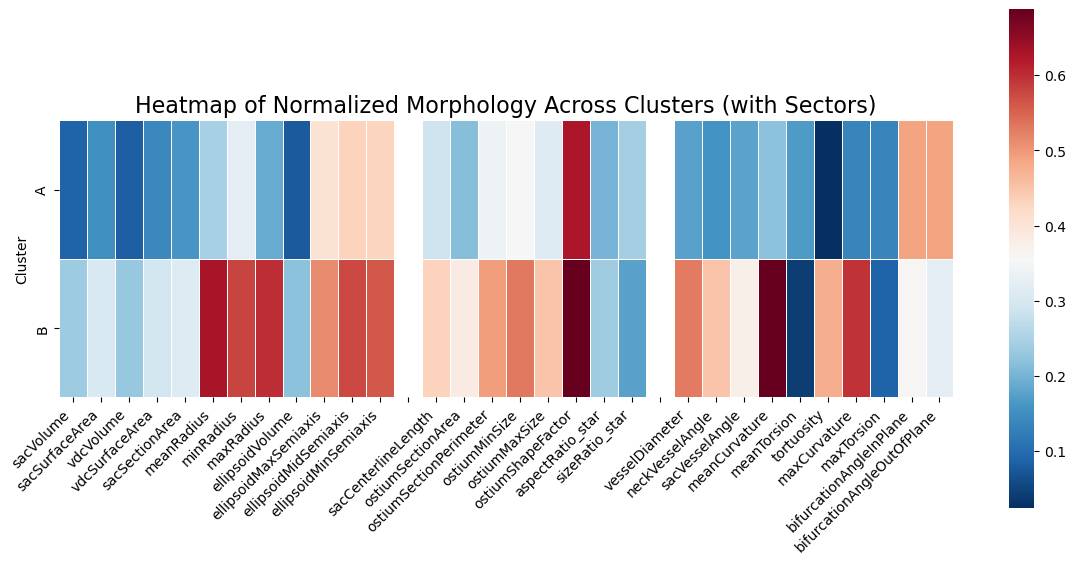

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming data is already loaded and preprocessed

# Define the list of numerical variables to be used
numerical_vars = ['sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 
                 'sacSectionArea','meanRadius', 'minRadius', 'maxRadius', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
                 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength', 
                 'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
                 'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
                 'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 
                 'meanCurvature', 'meanTorsion', 'tortuosity',
                 'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
                 'bifurcationAngleOutOfPlane']

# Normalize the numerical variables
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data[numerical_vars]), columns=numerical_vars)

# Add the cluster labels back to the normalized data
data_normalized['Cluster'] = data['Cluster']

# Map the cluster numbers to Cluster A and Cluster B
cluster_mapping = {0: 'A', 1: 'B'}
data_normalized['Cluster'] = data_normalized['Cluster'].map(cluster_mapping)

# Aggregate by cluster and calculate the mean of normalized values
cluster_means = data_normalized.groupby('Cluster').mean()

# Split the data into three sections based on the desired breaks
section_1 = cluster_means.loc[:, 'sacVolume':'ellipsoidMinSemiaxis']
section_2 = cluster_means.loc[:, 'sacCenterlineLength':'sizeRatio_star']
section_3 = cluster_means.loc[:, 'vesselDiameter':'bifurcationAngleOutOfPlane']

# Create NaN columns to act as a separator between the sections
separator_1 = pd.DataFrame(np.nan, index=cluster_means.index, columns=[''])
separator_2 = pd.DataFrame(np.nan, index=cluster_means.index, columns=[''])

# Concatenate the sections with NaN separators
cluster_means_separated = pd.concat([section_1, separator_1, section_2, separator_2, section_3], axis=1)

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjusted figure size
sns.heatmap(cluster_means_separated, cmap='RdBu_r', annot=False, linewidths=.5, cbar_kws={'shrink': 1.8})  # Adjust colorbar size
plt.title('Heatmap of Normalized Morphology Across Clusters (with Sectors)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=10)  # Adjust y-axis label font size
plt.tight_layout()  # Adjust layout to fit labels
plt.show()



In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming data is already loaded and preprocessed

# Define the list of numerical variables to be used
numerical_vars = [ 'ellipsoidMaxSemiaxis', 
                 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'vdcVolume', 'vdcSurfaceArea', 
                 'sacSectionArea', 'ellipsoidVolume', 'sacVolume', 'sacSurfaceArea', 'sacCenterlineLength', 
                 'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
                 'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
                 'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
                 'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
                 'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
                 'bifurcationAngleOutOfPlane']

# Normalize the numerical variables
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data[numerical_vars]), columns=numerical_vars)

# Add the cluster labels back to the normalized data
data_normalized['Cluster'] = data['Cluster']

# Aggregate by cluster and calculate the mean of normalized values
cluster_means = data_normalized.groupby('Cluster').mean()

# Convert the aggregated DataFrame into a tabular format for display
cluster_means_table = cluster_means.T  # Transpose to get clusters as columns and variables as rows

# Display the table
cluster_means_table_display = cluster_means_table.round(3)  # Round to 3 decimal places for readability
print(cluster_means_table_display)


Cluster                         0      1
ellipsoidMaxSemiaxis        0.405  0.512
ellipsoidMidSemiaxis        0.432  0.575
ellipsoidMinSemiaxis        0.429  0.562
vdcVolume                   0.082  0.230
vdcSurfaceArea              0.142  0.292
sacSectionArea              0.160  0.312
ellipsoidVolume             0.076  0.219
sacVolume                   0.086  0.235
sacSurfaceArea              0.151  0.302
sacCenterlineLength         0.288  0.431
ostiumSectionArea           0.214  0.382
ostiumSectionPerimeter      0.339  0.493
ostiumMinSize               0.356  0.532
ostiumMaxSize               0.314  0.449
ostiumShapeFactor           0.627  0.688
aspectRatio_star            0.202  0.237
sizeRatio_star              0.242  0.174
vesselDiameter              0.176  0.527
neckVesselAngle             0.156  0.449
sacVesselAngle              0.177  0.374
meanRadius                  0.246  0.630
meanCurvature               0.219  0.687
meanTorsion                 0.168  0.039
tortuosity      

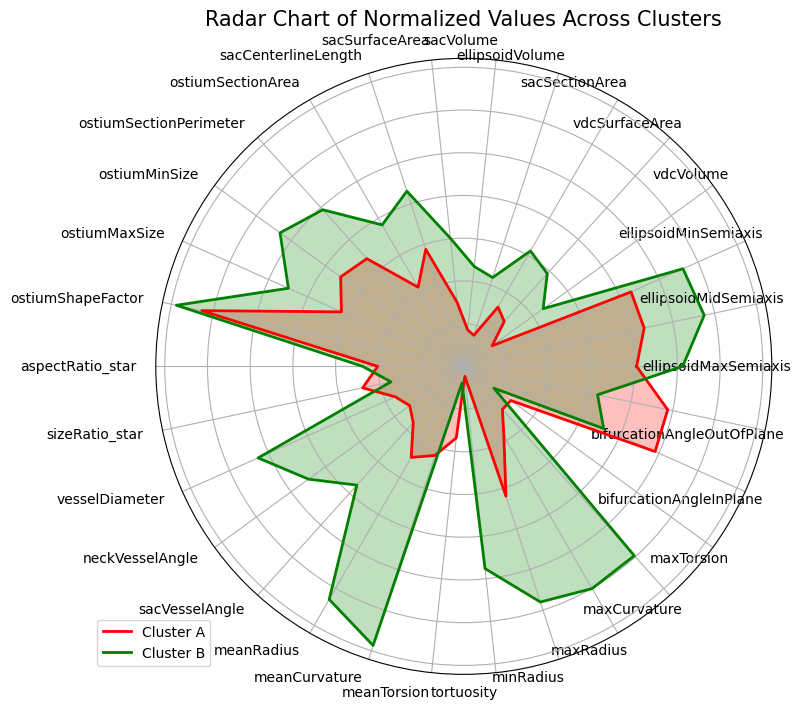

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Normalize the data for the radar chart
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data[numerical_vars]), columns=numerical_vars)

# Map the cluster numbers to "Cluster A" and "Cluster B"
cluster_mapping = {0: 'A', 1: 'B'}
data['Cluster'] = data['Cluster'].map(cluster_mapping)

data_normalized['Cluster'] = data['Cluster']

# Calculate the mean for each cluster
cluster_means = data_normalized.groupby('Cluster').mean()

# Radar chart preparation
labels = cluster_means.columns.tolist()
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Set colors for clusters
colors = {'A': 'red', 'B': 'green'}

for i, (index, row) in enumerate(cluster_means.iterrows()):
    data = row.tolist()
    data += data[:1]
    ax.plot(angles, data, linewidth=2, linestyle='solid', color=colors[index], label=f'Cluster {index}')
    ax.fill(angles, data, color=colors[index], alpha=0.25)

# Remove y-ticks and adjust x-tick labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])

# Adjust the label position to avoid overlap
ax.set_xticklabels(labels, size=10, ha='right', rotation=45)

plt.title('Radar Chart of Normalized Values Across Clusters', size=15)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


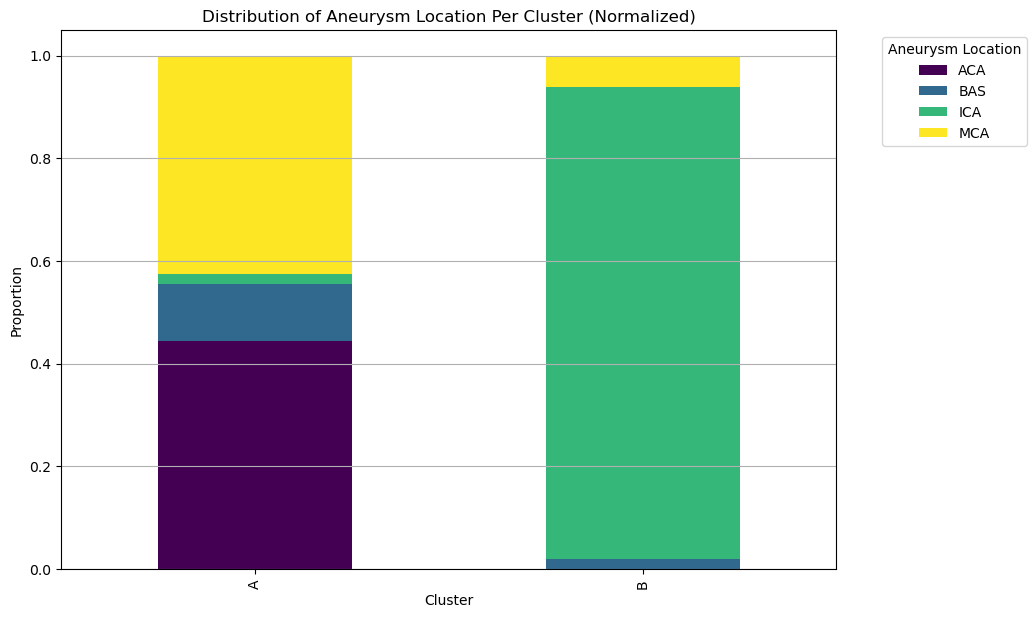

aneurysmLocation       ACA       BAS       ICA       MCA
Cluster                                                 
A                 0.444444  0.111111  0.018519  0.425926
B                 0.000000  0.020408  0.918367  0.061224
Chi-square test for ACA: p-value = 3.483139590802997e-07
Chi-square test for BAS: p-value = 0.15138266995559752
Chi-square test for ICA: p-value = 2.8146399357558743e-19
Chi-square test for MCA: p-value = 5.622950789746238e-05


In [36]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
file_path = "Merged_Aneurysm.csv"
data = pd.read_csv(file_path)

# Define your list of feature column names (replace with actual feature names if needed)
features = [
    'age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea',
    'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
    'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength',
    'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
    'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
    'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
    'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
    'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
    'bifurcationAngleOutOfPlane'
]

# Add cluster labels to the original data
data['Cluster'] = clusters_tsne

# Map the cluster numbers to Cluster A and Cluster B
cluster_mapping = {0: 'A', 1: 'B'}
data['Cluster'] = data['Cluster'].map(cluster_mapping)

# Group by cluster and aneurysm location, then normalize within each cluster
location_distribution = data.groupby(['Cluster', 'aneurysmLocation']).size().unstack(fill_value=0)
location_distribution = location_distribution.div(location_distribution.sum(axis=1), axis=0)

# Plot a stacked bar chart
ax = location_distribution.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')

# Add labels and title
plt.title('Distribution of Aneurysm Location Per Cluster (Normalized)')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Aneurysm Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

# Display the plot
plt.show()

print(location_distribution)

# Chi-square test for statistical significance within each aneurysm location across clusters
for location in location_distribution.columns:
    contingency_table = pd.crosstab(data['Cluster'], data['aneurysmLocation'] == location)
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    print(f'Chi-square test for {location}: p-value = {p_value}')


Frequency Distribution of ruptureStatus Across Clusters (%):
Cluster                A          B
ruptureStatus                      
R              53.703704  30.612245
U              46.296296  69.387755




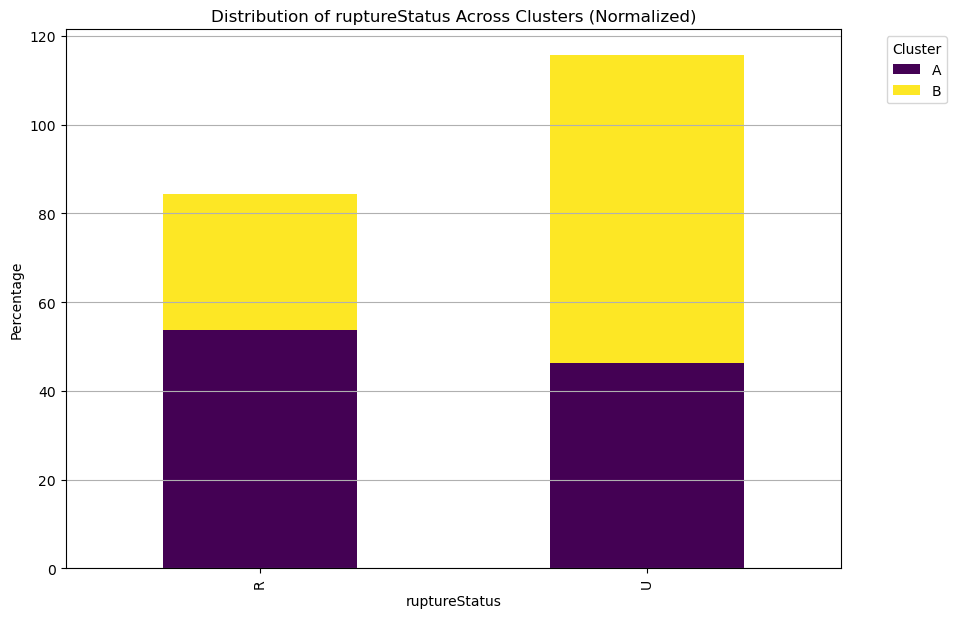

Frequency Distribution of aneurysmType Across Clusters (%):
Cluster           A          B
aneurysmType                  
LAT             0.0  81.632653
TER           100.0  18.367347




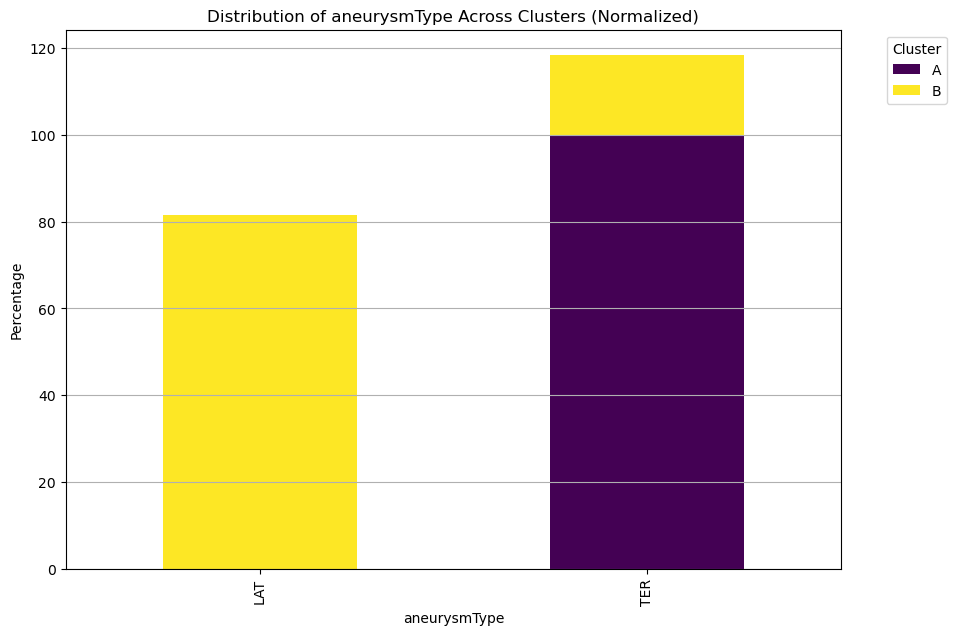

Frequency Distribution of multipleAneurysms Across Clusters (%):
Cluster                    A          B
multipleAneurysms                      
False              85.185185  81.632653
True               14.814815  18.367347




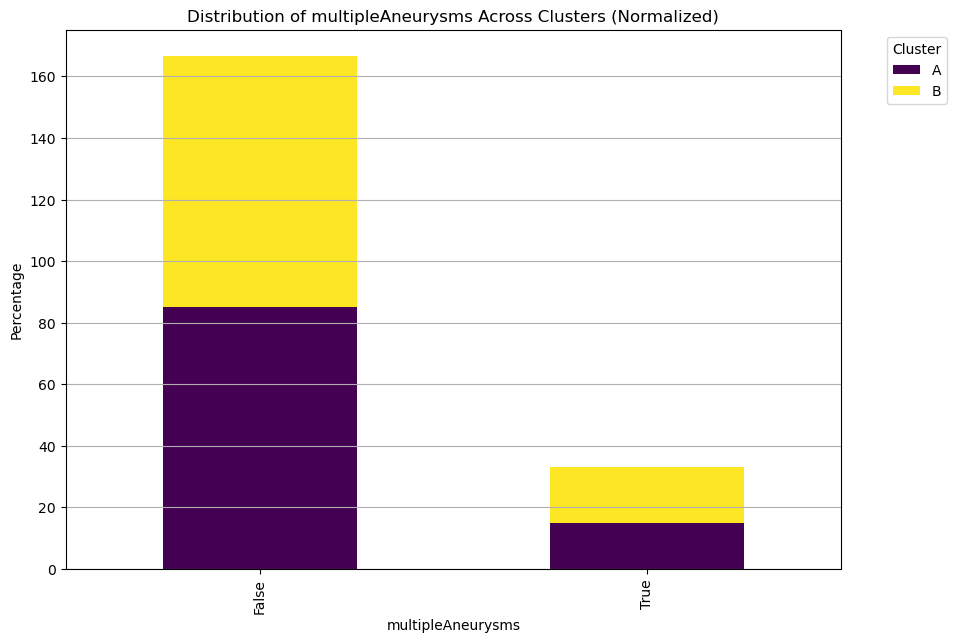

Frequency Distribution of sex Across Clusters (%):
Cluster          A          B
sex                          
F        46.296296  81.632653
M        53.703704  18.367347




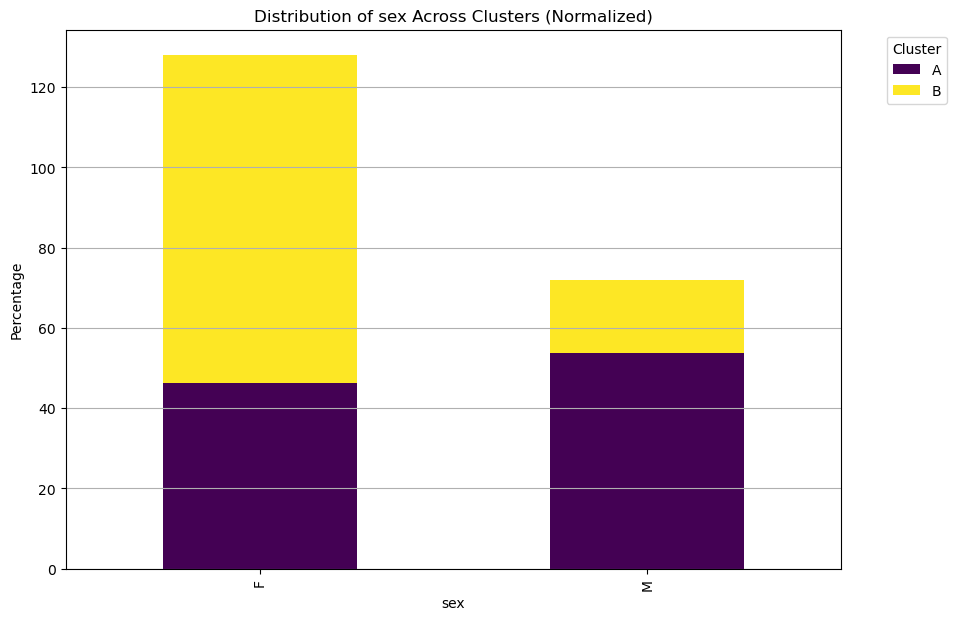

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with 'Cluster' labels and the categorical features mentioned

# List of categorical features to analyze
categorical_features = ['ruptureStatus', 'aneurysmType', 'multipleAneurysms', 'sex']

# Loop through each categorical feature and create frequency tables and visualizations
for feature in categorical_features:
    # Create a crosstab (frequency table) for the feature across clusters
    crosstab = pd.crosstab(data[feature], data['Cluster'], normalize='columns') * 100
    
    # Display the crosstab
    print(f"Frequency Distribution of {feature} Across Clusters (%):")
    print(crosstab)
    print("\n")
    
    # Plot a stacked bar chart
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
    plt.title(f'Distribution of {feature} Across Clusters (Normalized)')
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y')
    plt.show()


In [41]:
# Define angle features
angle_columns = [
    'bifurcationAngleInPlane',
    'bifurcationAngleOutOfPlane',
    'neckVesselAngle',
    'sacVesselAngle'
]

# Add cluster labels from `clusters_tsne`
data['Cluster'] = clusters_tsne

# Map the cluster numbers to Cluster A and Cluster B
cluster_mapping = {0: 'A', 1: 'B'}
data['Cluster'] = data['Cluster'].map(cluster_mapping)

# Group by Cluster and calculate descriptive statistics for angle features
angle_stats_by_cluster = data.groupby('Cluster')[angle_columns].agg(['mean', 'std', 'min', 'max'])

# Display the results
pd.set_option('display.max_columns', None)
print(angle_stats_by_cluster)


        bifurcationAngleInPlane                                    \
                           mean        std        min         max   
Cluster                                                             
A                    134.226633  27.177673  67.350837  189.045855   
B                    114.709445  24.935459  61.651005  209.673523   

        bifurcationAngleOutOfPlane                                 \
                              mean       std       min        max   
Cluster                                                             
A                        23.414451  8.713252  6.058203  44.934416   
B                        16.360671  9.883173  2.903025  39.719586   

        neckVesselAngle                                  sacVesselAngle  \
                   mean        std       min         max           mean   
Cluster                                                                   
A             20.629190  16.356463  0.961829   69.871051      26.465542   
B       